# Assignment 2

In [421]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [422]:
# read data from csv
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
sample_size = 20000
train_df = train_df.sample(sample_size)

## Step 1: Exploratory Data Analysis

In [423]:
# check for missing values in test csv
test_df.isna().sum()

Index        0
Sentiment    0
Text         0
dtype: int64

In [424]:
# check for missing values in training csv
train_df.isna().sum()

Index        0
Sentiment    0
Text         0
dtype: int64

In [425]:
# size of test csv
test_df['Text'].size

359

In [426]:
# size of training csv
train_df['Text'].size

20000

c:\Users\crescent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\crescent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


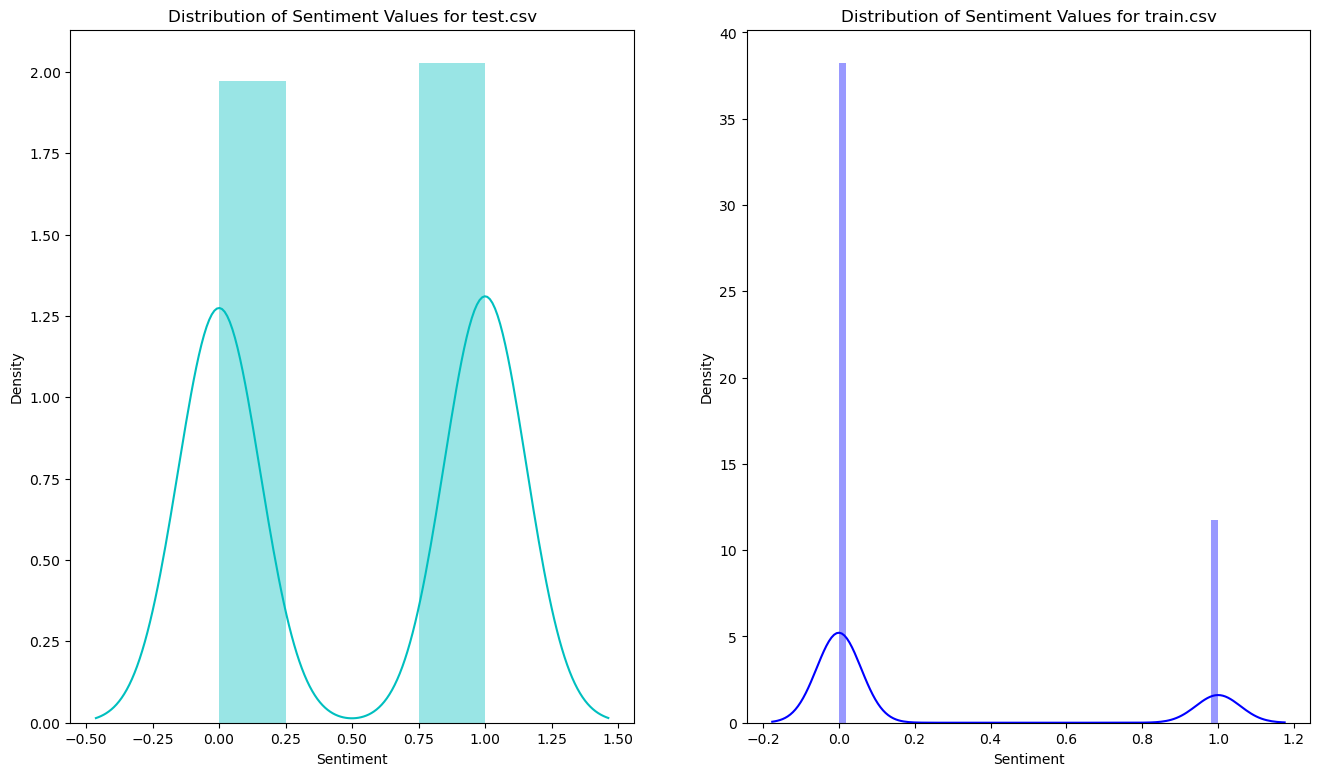

In [427]:
# plot SENTIMENT distributions for each file
fig = plt.figure(figsize=(16,9))

# first subplot (test)
sp1 = fig.add_subplot(121) 
sns.distplot(test_df['Sentiment'], color='c') # yes
sp1.set_title('Distribution of Sentiment Values for test.csv')

# second subplot (train)
sp2 = fig.add_subplot(122)
sns.distplot(train_df['Sentiment'], color='b') # yes
sp2.set_title('Distribution of Sentiment Values for train.csv')

# graph
plt.show()

## Step 2: Text Preprocessing

In [428]:
# imports
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize

In [429]:
# stemmer
stemmer = SnowballStemmer("english")
def sent_stem(sent):
    tokens = sent.split()
    stemmed = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed)

In [430]:
# preprocess training data
for sent in train_df['Text']:
    # lowercase
    newsent = sent.lower()
    # get rid of person tag at beginning
    newsent = re.sub("@[a-z0-9./_]+", ' ', newsent)
    # get rid of urls
    newsent = re.sub("https?://[a-z0-9./]+", ' ', newsent)
    # get rid of digital numbers, special characters
    newsent = re.sub("[^a-z ]", '', newsent)
    # replace in dataframe (stem first)
    train_df.replace(sent, sent_stem(newsent), inplace=True)

train_df.head(20)

,Index,Sentiment,Text
529017,529017,0,they dont have our beasti pizza
452984,452984,0,aw man miss the laker game
420882,420882,0,when you look at the whole stori lead up to it...
111415,111415,0,is kinda lone
535332,535332,0,shit i just hit my head on the wall how upset ...
227908,227908,0,im realli not fond of creeper
526579,526579,0,havent had more than ppl show on my list to ad...
638392,638392,0,slow ass traffic
183423,183423,0,missin da game n got to record it wat a dick s...
809211,809211,1,yesbut today daddi has them im out for the day...


In [431]:
# preprocess test data
for sent in test_df['Text']:
    # lowercase
    newsent = sent.lower()
    # get rid of person tag at beginning
    newsent = re.sub("@[a-z0-9./_]+", ' ', newsent)
    # get rid of urls
    newsent = re.sub("https?://[a-z0-9./]+", ' ', newsent)
    # get rid of digital numbers, special characters
    newsent = re.sub("[^a-z ]", '', newsent)
    # replace in dataframe (stem first)
    test_df.replace(sent, sent_stem(newsent), inplace=True)

test_df.head(20)

,Index,Sentiment,Text
0,0,1,i loooooooovvvvvvee my kindl not that the dx i...
1,1,1,read my kindl love it lee child is good read
2,2,1,ok first asses of the kindl it fuck rock
3,3,1,youll love your kindl ive had mine for a few m...
4,4,1,fair enough but i have the kindl and i think i...
5,5,1,no it is too big im quit happi with the kindl
6,6,0,fuck this economi i hate aig and their non loa...
7,7,1,jqueri is my new best friend
8,8,1,love twitter
9,9,1,how can you not love obama he make joke about ...


## Step 3: Linguistic Feature Extraction

In [432]:
# imports
import nltk

In [433]:
# bag of words for training
## src: https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-bag-of-words-with-python-example/
## imports
from sklearn.feature_extraction.text import CountVectorizer
## initialize vectorizer
vectorizer = CountVectorizer(stop_words='english')
train_bag_of_words = vectorizer.fit_transform(train_df['Text'])

In [434]:
# bag of words for testing
## src: https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-bag-of-words-with-python-example/
## initialize vectorizer
test_bag_of_words = vectorizer.transform(test_df['Text'])

In [435]:
# tf*idf for training
## imports
from sklearn.feature_extraction.text import TfidfVectorizer
train_tr_idf_model = TfidfVectorizer(stop_words='english')
## transform corpus to tfidf model
train_tf_idf_vector = train_tr_idf_model.fit_transform(train_df['Text'])
## convert to array
train_tf_idf_array = train_tf_idf_vector.toarray()
## print
print(train_tf_idf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [436]:
# tf*idf for testing
## transform corpus to tfidf model
test_tf_idf_vector = train_tr_idf_model.transform(test_df['Text'])
## convert to array
test_tf_idf_array = test_tf_idf_vector.toarray()
## print
print(test_tf_idf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [437]:
# word2vec for train
## imports
from gensim.models import Word2Vec
from nltk import word_tokenize
## create and save model
train_model = Word2Vec(sentences=[nltk.word_tokenize(sent) for sent in train_df['Text']], vector_size=100, window=5, min_count=1, workers=4)
train_model.save('trword2vec.model')
train_model.train(train_df['Text'], total_examples=train_df['Text'].size, epochs=100)

(82728706, 117781600)

In [438]:
## make sentence vectors
## https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/
def vectorize(sentence):
    # split sentence into words
    words = nltk.word_tokenize(sentence)
    # for all words in word vector average the word values in word vector
    words_vecs = [train_model.wv[word] for word in words if word in train_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

# sentence vector for training
X_train = np.array([vectorize(sentence) for sentence in train_df['Text']])

In [439]:
# word2vec for test
## create and save model
test_model = Word2Vec(sentences=[nltk.word_tokenize(sent) for sent in test_df['Text']], vector_size=100, window=5, min_count=1, workers=4)
test_model.save('ttword2vec.model')
test_model.train(test_df['Text'], total_examples=test_df['Text'].size, epochs=100)
## sentence vector for testing
X_test = np.array([vectorize(sentence) for sentence in test_df['Text']])

## Step 4: Build your sentiment classification model.

In [440]:
# import classifiers and metrics
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # SVM
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

> Bag of Word Models

In [441]:
# instantiate models
bow_lgr_model = LogisticRegression(max_iter=sample_size);
bow_svm_model = SVC(probability=True)
bow_nby_model = GaussianNB();
bow_rfr_model = RandomForestClassifier();

In [442]:
# train the models using .fit() function
bow_lgr_model.fit(train_bag_of_words, train_df['Sentiment'])
bow_svm_model.fit(train_bag_of_words, train_df['Sentiment'])
bow_nby_model.fit(train_bag_of_words.toarray(), train_df['Sentiment'])
bow_rfr_model.fit(train_bag_of_words, train_df['Sentiment'])

RandomForestClassifier()

In [443]:
# test models using the test data
bow_y_lgr_pred = bow_lgr_model.predict(test_bag_of_words)
bow_y_lgr_prob_pred = bow_lgr_model.predict_proba(test_bag_of_words)

bow_y_svm_pred = bow_svm_model.predict(test_bag_of_words)
bow_y_svm_prob_pred = bow_svm_model.predict_proba(test_bag_of_words)

bow_y_nby_pred = bow_nby_model.predict(test_bag_of_words.toarray())
bow_y_nby_prob_pred = bow_nby_model.predict_proba(test_bag_of_words.toarray())

bow_y_rfr_pred = bow_rfr_model.predict(test_bag_of_words)
bow_y_rfr_prob_pred = bow_rfr_model.predict_proba(test_bag_of_words)

> TF IDF Models

In [444]:
# instantiate models
tf_lgr_model = LogisticRegression(max_iter=sample_size);
tf_svm_model = SVC(probability=True)
tf_nby_model = GaussianNB();
tf_rfr_model = RandomForestClassifier();

In [445]:
# train the models using .fit() function
tf_lgr_model.fit(train_tf_idf_vector, train_df['Sentiment'])
tf_svm_model.fit(train_tf_idf_vector, train_df['Sentiment'])
tf_nby_model.fit(train_tf_idf_array, train_df['Sentiment'])
tf_rfr_model.fit(train_tf_idf_vector, train_df['Sentiment'])

RandomForestClassifier()

In [446]:
# test models using the test data
tf_y_lgr_pred = tf_lgr_model.predict(test_tf_idf_vector)
tf_y_lgr_prob_pred = tf_lgr_model.predict_proba(test_tf_idf_vector)

tf_y_svm_pred = tf_svm_model.predict(test_tf_idf_vector)
tf_y_svm_prob_pred = tf_svm_model.predict_proba(test_tf_idf_vector)

tf_y_nby_pred = tf_nby_model.predict(test_tf_idf_array)
tf_y_nby_prob_pred = tf_nby_model.predict_proba(test_tf_idf_array)

tf_y_rfr_pred = tf_rfr_model.predict(test_tf_idf_vector)
tf_y_rfr_prob_pred = tf_rfr_model.predict_proba(test_tf_idf_vector)

> WORD2VEC MODELS

In [447]:
# instantiate models
w2v_lgr_model = LogisticRegression(max_iter=sample_size);
w2v_svm_model = SVC(probability=True)
w2v_nby_model = GaussianNB();
w2v_rfr_model = RandomForestClassifier();

In [448]:
# train the models using .fit() function
w2v_lgr_model.fit(X_train, train_df['Sentiment'])
w2v_svm_model.fit(X_train, train_df['Sentiment'])
w2v_nby_model.fit(X_train, train_df['Sentiment'])
w2v_rfr_model.fit(X_train, train_df['Sentiment'])

RandomForestClassifier()

In [449]:
# test models using the test data
w2v_y_lgr_pred = w2v_lgr_model.predict(X_test)
w2v_y_lgr_prob_pred = w2v_lgr_model.predict_proba(X_test)

w2v_y_svm_pred = w2v_svm_model.predict(X_test)
w2v_y_svm_prob_pred = w2v_svm_model.predict_proba(X_test)

w2v_y_nby_pred = w2v_nby_model.predict(X_test)
w2v_y_nby_prob_pred = w2v_nby_model.predict_proba(X_test)

w2v_y_rfr_pred = w2v_rfr_model.predict(X_test)
w2v_y_rfr_prob_pred = w2v_rfr_model.predict_proba(X_test)

## Step 5: Model evaluation.

> bag of words models

In [450]:
# classification reports
print(classification_report(test_df['Sentiment'], bow_y_lgr_pred)) # 1. logistic regression
print(classification_report(test_df['Sentiment'], bow_y_svm_pred)) # 2. svm
print(classification_report(test_df['Sentiment'], bow_y_nby_pred)) # 3. naive bayes
print(classification_report(test_df['Sentiment'], bow_y_rfr_pred)) # 4. random forest

              precision    recall  f1-score   support

           0       0.65      0.94      0.77       177
           1       0.90      0.51      0.65       182

    accuracy                           0.72       359
   macro avg       0.78      0.72      0.71       359
weighted avg       0.78      0.72      0.71       359

              precision    recall  f1-score   support

           0       0.59      0.99      0.74       177
           1       0.97      0.34      0.50       182

    accuracy                           0.66       359
   macro avg       0.78      0.66      0.62       359
weighted avg       0.78      0.66      0.62       359

              precision    recall  f1-score   support

           0       0.57      0.59      0.58       177
           1       0.59      0.57      0.58       182

    accuracy                           0.58       359
   macro avg       0.58      0.58      0.58       359
weighted avg       0.58      0.58      0.58       359

              preci

In [451]:
# combine all the items so that we can iterate through them
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
predictions = [bow_y_lgr_pred, bow_y_svm_pred, bow_y_nby_pred, bow_y_rfr_pred]
predicted_probabilities = [bow_y_lgr_prob_pred, bow_y_svm_prob_pred, bow_y_nby_prob_pred, bow_y_rfr_prob_pred]

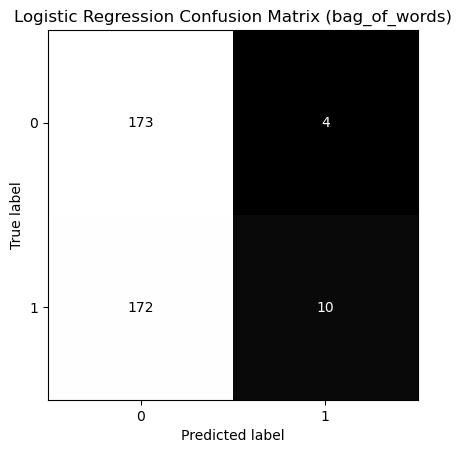

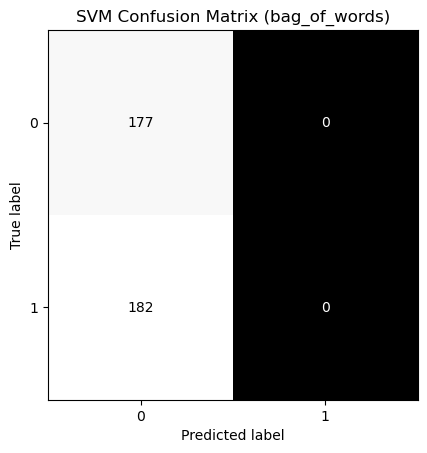

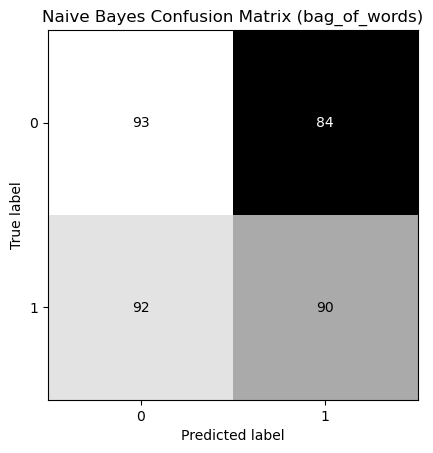

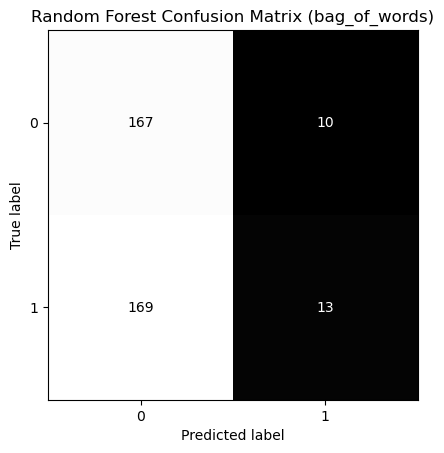

In [464]:
# display confusion matrix for each model type
for name, pred, prob_pred in zip(model_names, predictions, predicted_probabilities): 
    display = ConfusionMatrixDisplay(confusion_matrix(test_df['Sentiment'].ravel(), pred))
    display.plot(include_values=True, cmap='gray', colorbar=False)
    display.ax_.set_title(f"{name} Confusion Matrix (bag_of_words)")

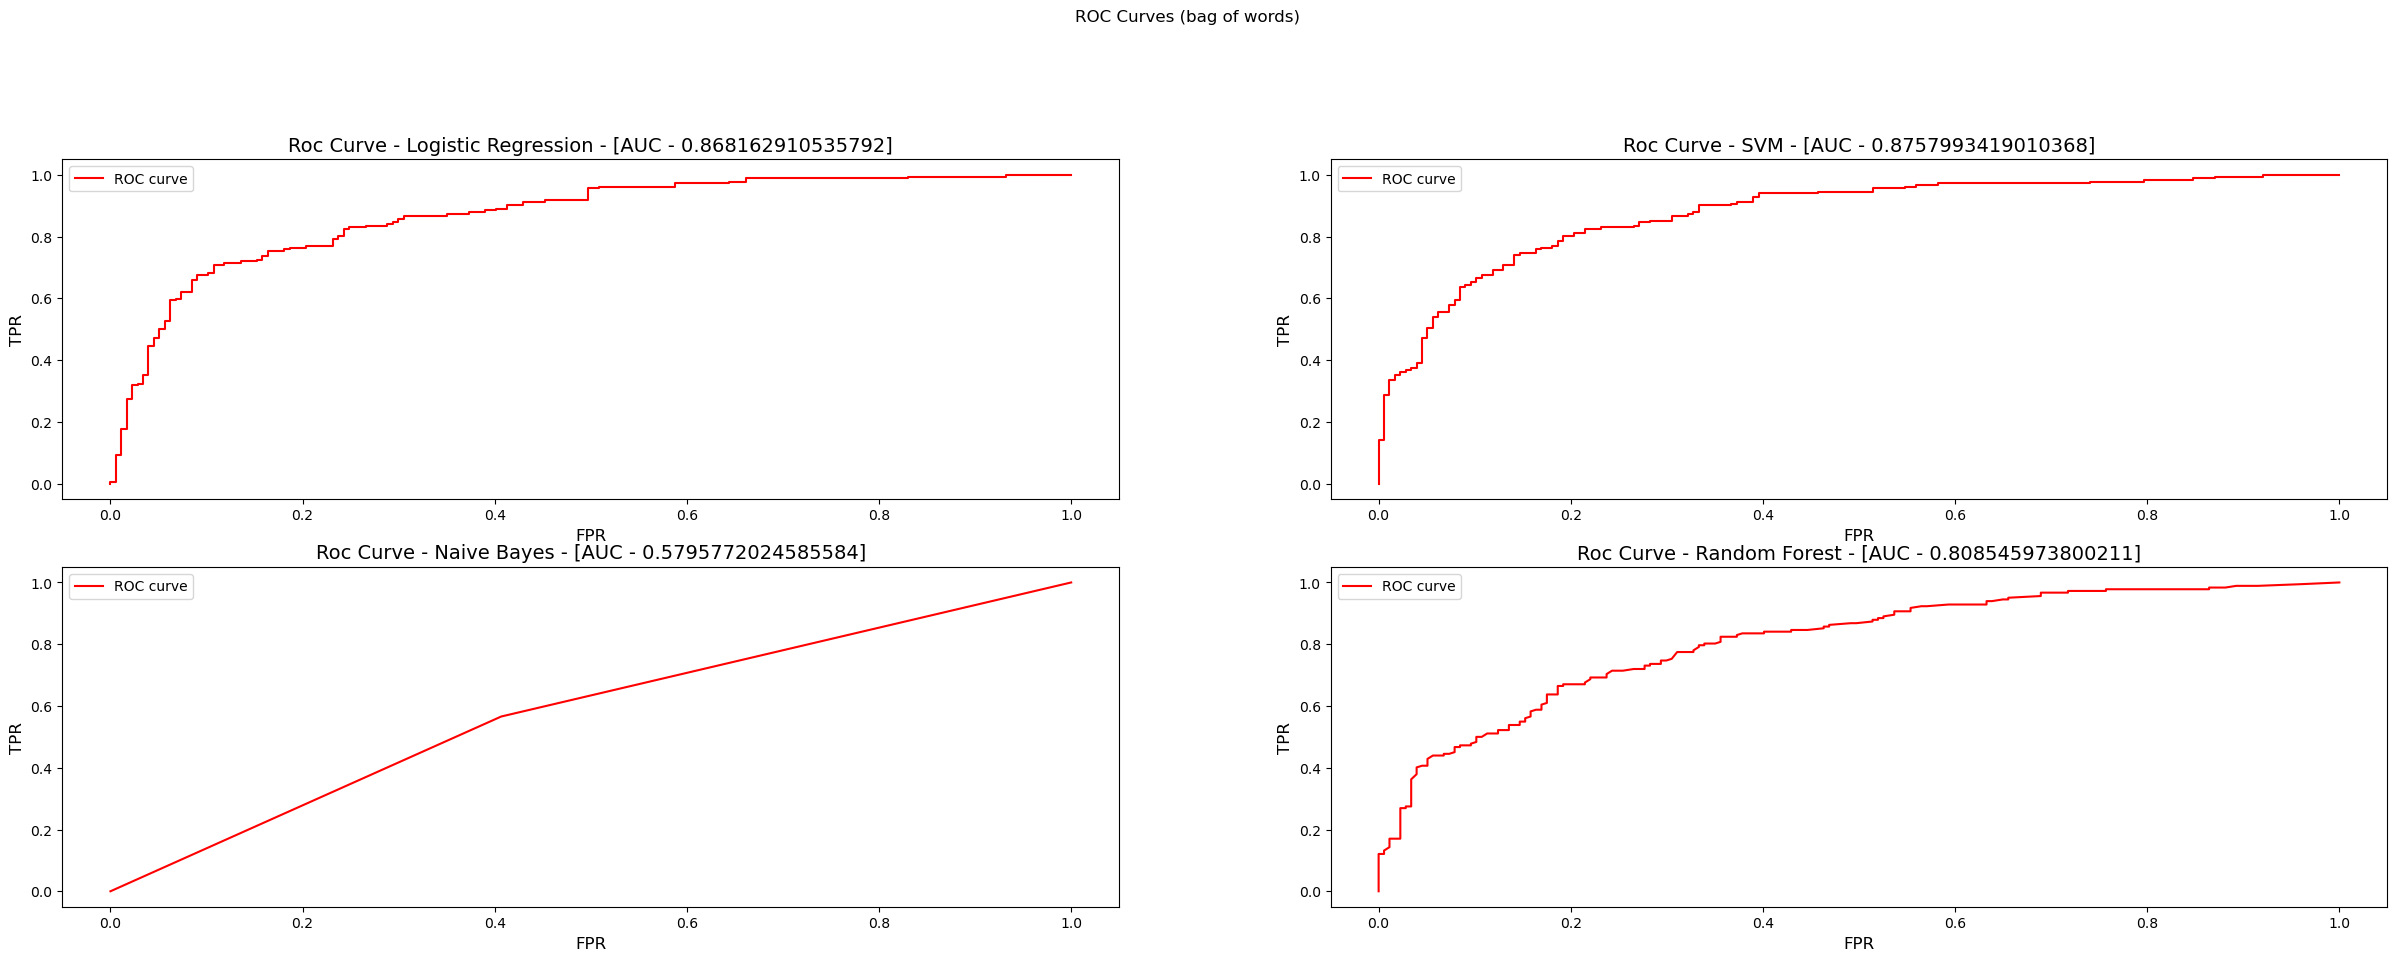

In [453]:
# prepare plot for ROC curves
plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves (bag of words)")
plot_index = 1 # so we can have multiple curves

for name, prediction, prob_pred in zip(model_names, predictions, predicted_probabilities):
    # get false positive rate, true positive rate, and thresholds from roc_curve(...)
    fpr, tpr, thresholds = roc_curve(test_df['Sentiment'], prob_pred[:, 1])
    # get AUCs to compare ROC curves later 
    auc_score = auc(fpr, tpr)

    # create subplots
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plot_index += 1

    # titles and labels
    plt.title(f'Roc Curve - {name} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
plt.show()

> tf*idf models

In [454]:
# classification reports
print(classification_report(test_df['Sentiment'], tf_y_lgr_pred)) # 1. logistic regression
print(classification_report(test_df['Sentiment'], tf_y_svm_pred)) # 2. svm
print(classification_report(test_df['Sentiment'], tf_y_nby_pred)) # 3. naive bayes
print(classification_report(test_df['Sentiment'], tf_y_rfr_pred)) # 4. random forest

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       177
           1       0.95      0.38      0.55       182

    accuracy                           0.68       359
   macro avg       0.78      0.68      0.65       359
weighted avg       0.78      0.68      0.65       359

              precision    recall  f1-score   support

           0       0.59      0.98      0.74       177
           1       0.95      0.33      0.49       182

    accuracy                           0.65       359
   macro avg       0.77      0.66      0.61       359
weighted avg       0.77      0.65      0.61       359

              precision    recall  f1-score   support

           0       0.57      0.60      0.59       177
           1       0.59      0.57      0.58       182

    accuracy                           0.58       359
   macro avg       0.58      0.58      0.58       359
weighted avg       0.58      0.58      0.58       359

              preci

In [455]:
# combine all the items so that we can iterate through them
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
predictions = [tf_y_lgr_pred, tf_y_svm_pred, tf_y_nby_pred, tf_y_rfr_pred]
predicted_probabilities = [tf_y_lgr_prob_pred, tf_y_svm_prob_pred, tf_y_nby_prob_pred, tf_y_rfr_prob_pred]

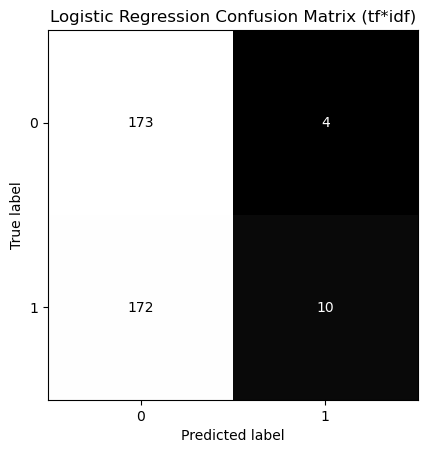

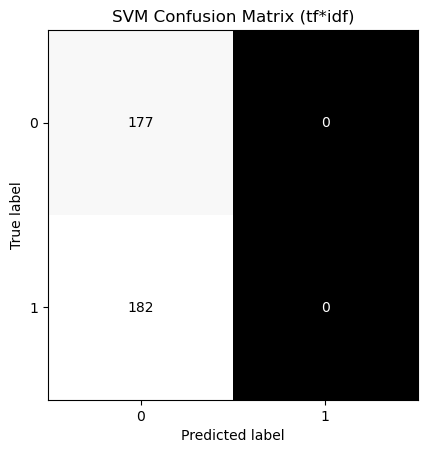

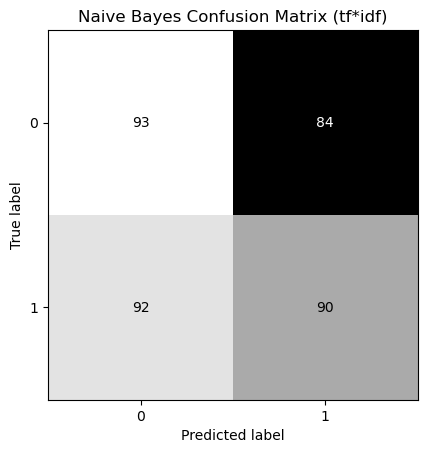

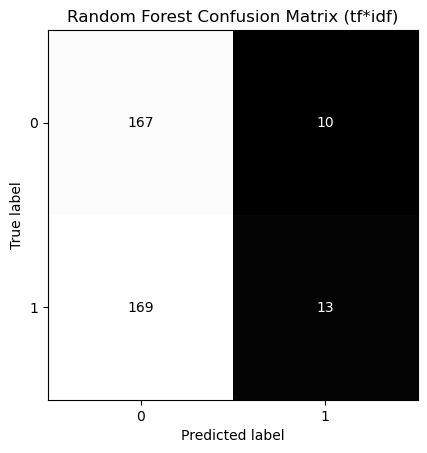

In [465]:
# display confusion matrix for each model type
for name, pred, prob_pred in zip(model_names, predictions, predicted_probabilities): 
    display = ConfusionMatrixDisplay(confusion_matrix(test_df['Sentiment'].ravel(), pred))
    display.plot(include_values=True, cmap='gray', colorbar=False)
    display.ax_.set_title(f"{name} Confusion Matrix (tf*idf)")

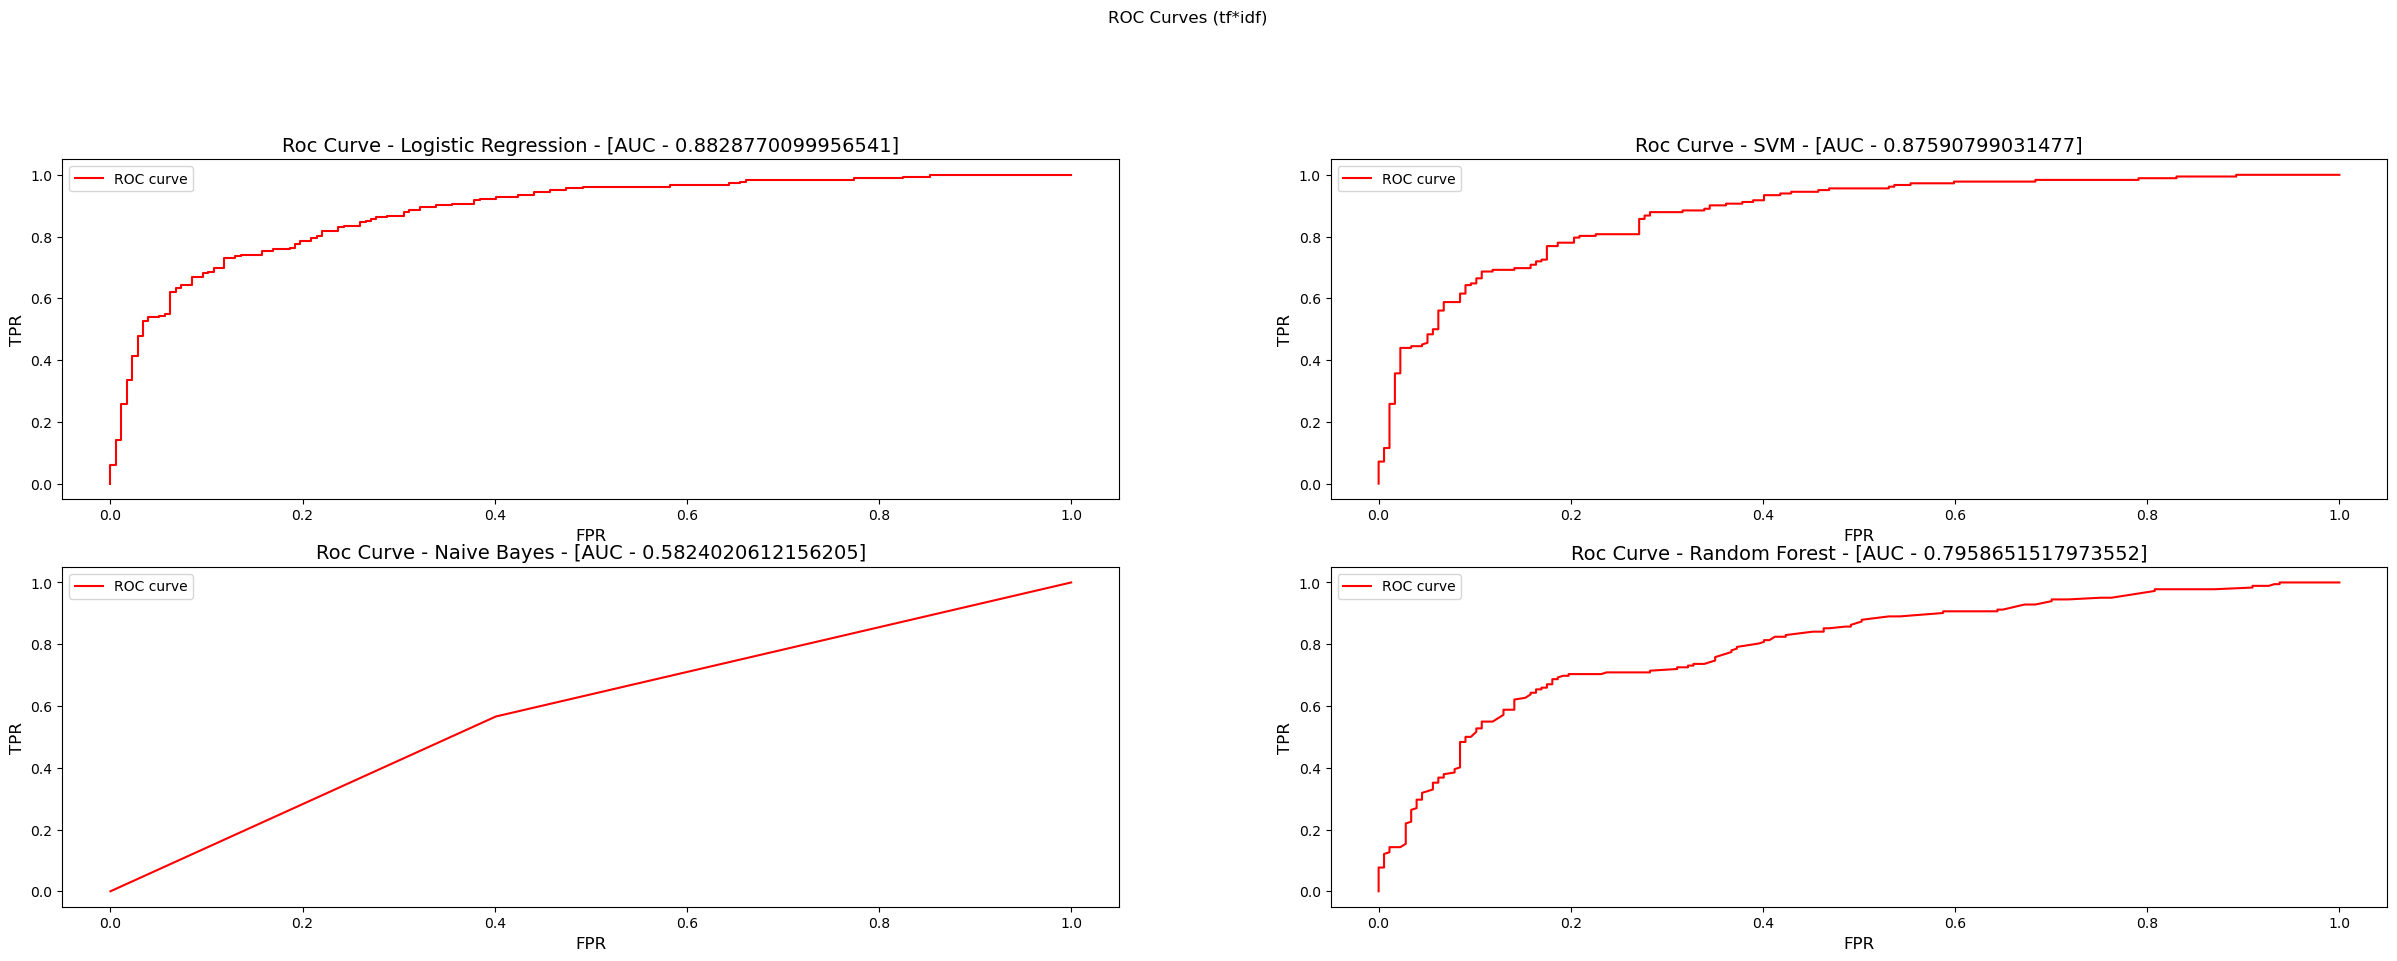

In [457]:
# prepare plot for ROC curves
plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves (tf*idf)")
plot_index = 1 # so we can have multiple curves

for name, prediction, prob_pred in zip(model_names, predictions, predicted_probabilities):
    # get false positive rate, true positive rate, and thresholds from roc_curve(...)
    fpr, tpr, thresholds = roc_curve(test_df['Sentiment'], prob_pred[:, 1])
    # get AUCs to compare ROC curves later 
    auc_score = auc(fpr, tpr)

    # create subplots
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plot_index += 1

    # titles and labels
    plt.title(f'Roc Curve - {name} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
plt.show()

> word2vec models

In [458]:
# classification reports
print(classification_report(test_df['Sentiment'], w2v_y_lgr_pred)) # 1. logistic regression
print(classification_report(test_df['Sentiment'], w2v_y_svm_pred)) # 2. svm
print(classification_report(test_df['Sentiment'], w2v_y_nby_pred)) # 3. naive bayes
print(classification_report(test_df['Sentiment'], w2v_y_rfr_pred)) # 4. random forest

              precision    recall  f1-score   support

           0       0.50      0.98      0.66       177
           1       0.71      0.05      0.10       182

    accuracy                           0.51       359
   macro avg       0.61      0.52      0.38       359
weighted avg       0.61      0.51      0.38       359

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       177
           1       0.00      0.00      0.00       182

    accuracy                           0.49       359
   macro avg       0.25      0.50      0.33       359
weighted avg       0.24      0.49      0.33       359

              precision    recall  f1-score   support

           0       0.50      0.53      0.51       177
           1       0.52      0.49      0.51       182

    accuracy                           0.51       359
   macro avg       0.51      0.51      0.51       359
weighted avg       0.51      0.51      0.51       359

              preci

c:\Users\crescent\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\crescent\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\crescent\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [459]:

# combine all the items so that we can iterate through them
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
predictions = [w2v_y_lgr_pred, w2v_y_svm_pred, w2v_y_nby_pred, w2v_y_rfr_pred]
predicted_probabilities = [w2v_y_lgr_prob_pred, w2v_y_svm_prob_pred, w2v_y_nby_prob_pred, w2v_y_rfr_prob_pred]

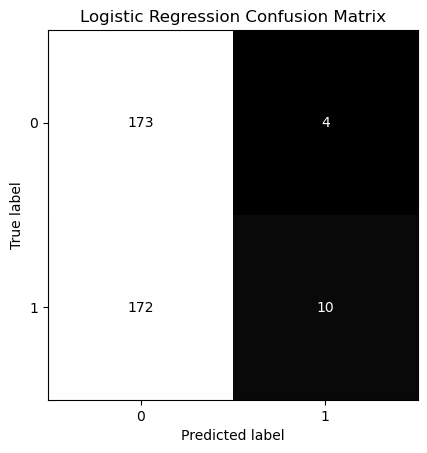

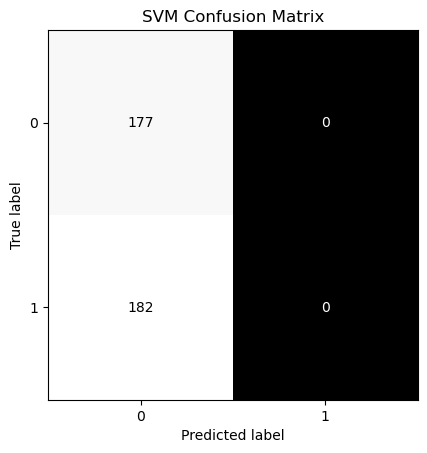

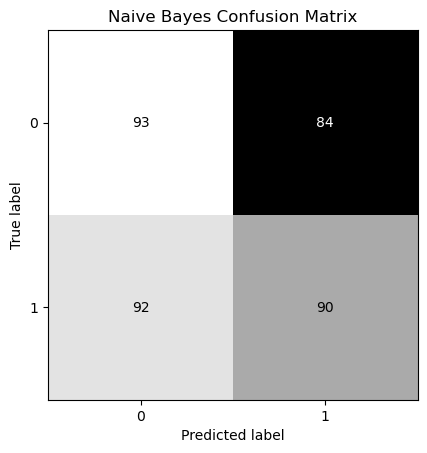

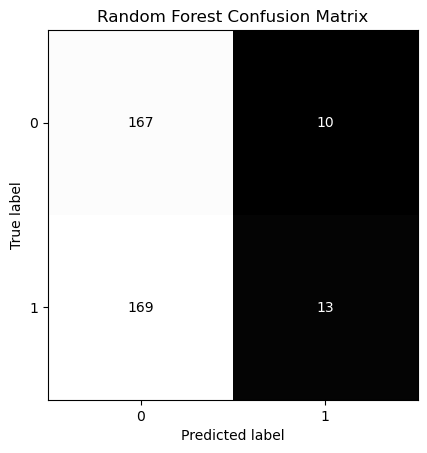

In [460]:

# display confusion matrix for each model type
for name, pred, prob_pred in zip(model_names, predictions, predicted_probabilities): 
    display = ConfusionMatrixDisplay(confusion_matrix(test_df['Sentiment'].ravel(), pred))
    display.plot(include_values=True, cmap='gray', colorbar=False)
    display.ax_.set_title(f"{name} Confusion Matrix (word2vec)")

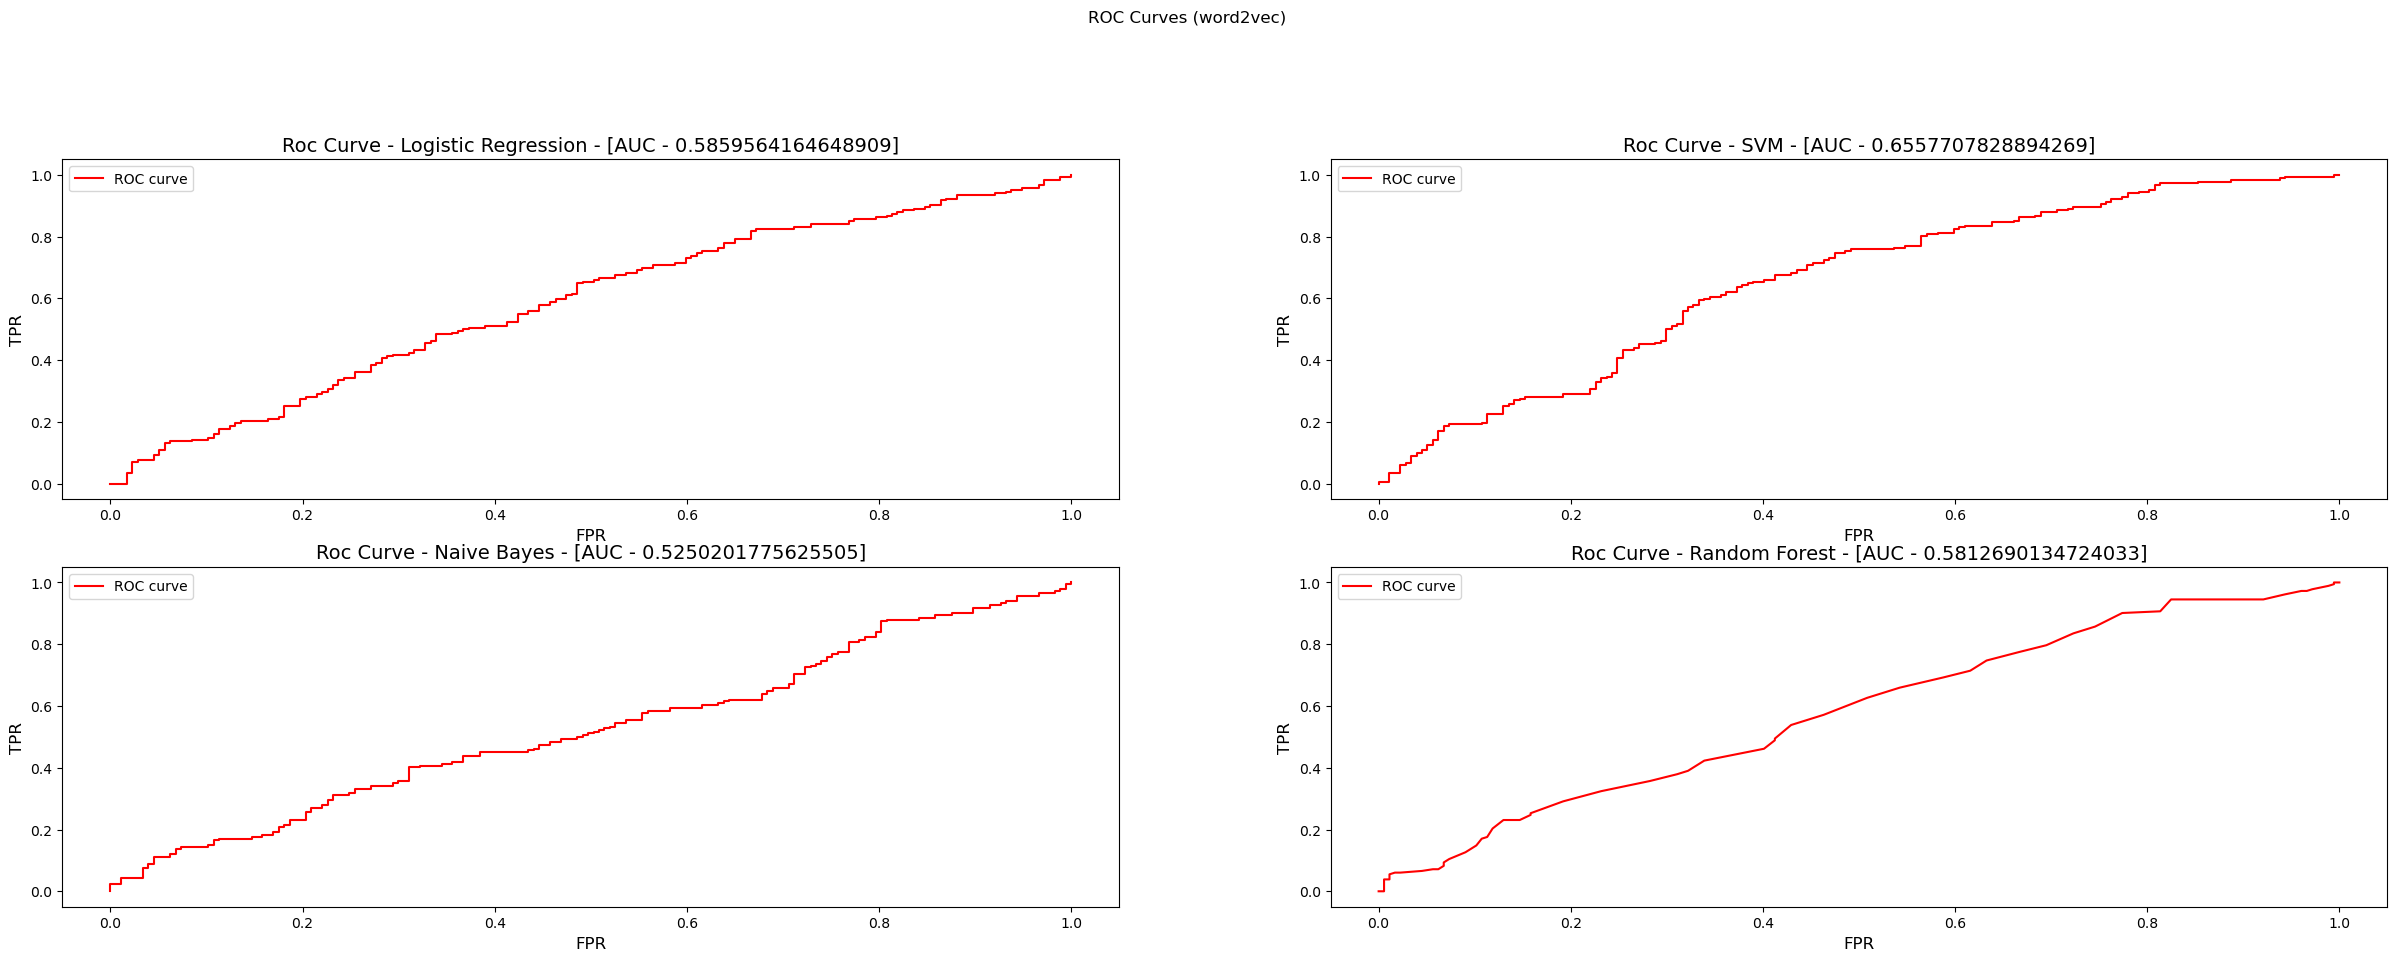

In [461]:
# prepare plot for ROC curves
plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves (word2vec)")
plot_index = 1 # so we can have multiple curves

for name, prediction, prob_pred in zip(model_names, predictions, predicted_probabilities):
    # get false positive rate, true positive rate, and thresholds from roc_curve(...)
    fpr, tpr, thresholds = roc_curve(test_df['Sentiment'], prob_pred[:, 1])
    # get AUCs to compare ROC curves later 
    auc_score = auc(fpr, tpr)

    # create subplots
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plot_index += 1

    # titles and labels
    plt.title(f'Roc Curve - {name} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
plt.show()